<a href="https://colab.research.google.com/github/b-richins92/Cancer_Prediction/blob/main/Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [4]:
with open('clean_df.csv') as f:
    df=pd.read_csv(f)

In [5]:
X=df.drop("Cancer",axis=1)
X = StandardScaler().fit(X).transform(X)

In [64]:
# creating PCA with 42 components so that we can capture 95% of the variance as seen in the output below
pca=PCA(n_components = 2).fit(X)
sum = np.cumsum(pca.explained_variance_ratio_)
sum

array([0.06446694, 0.1221913 ])

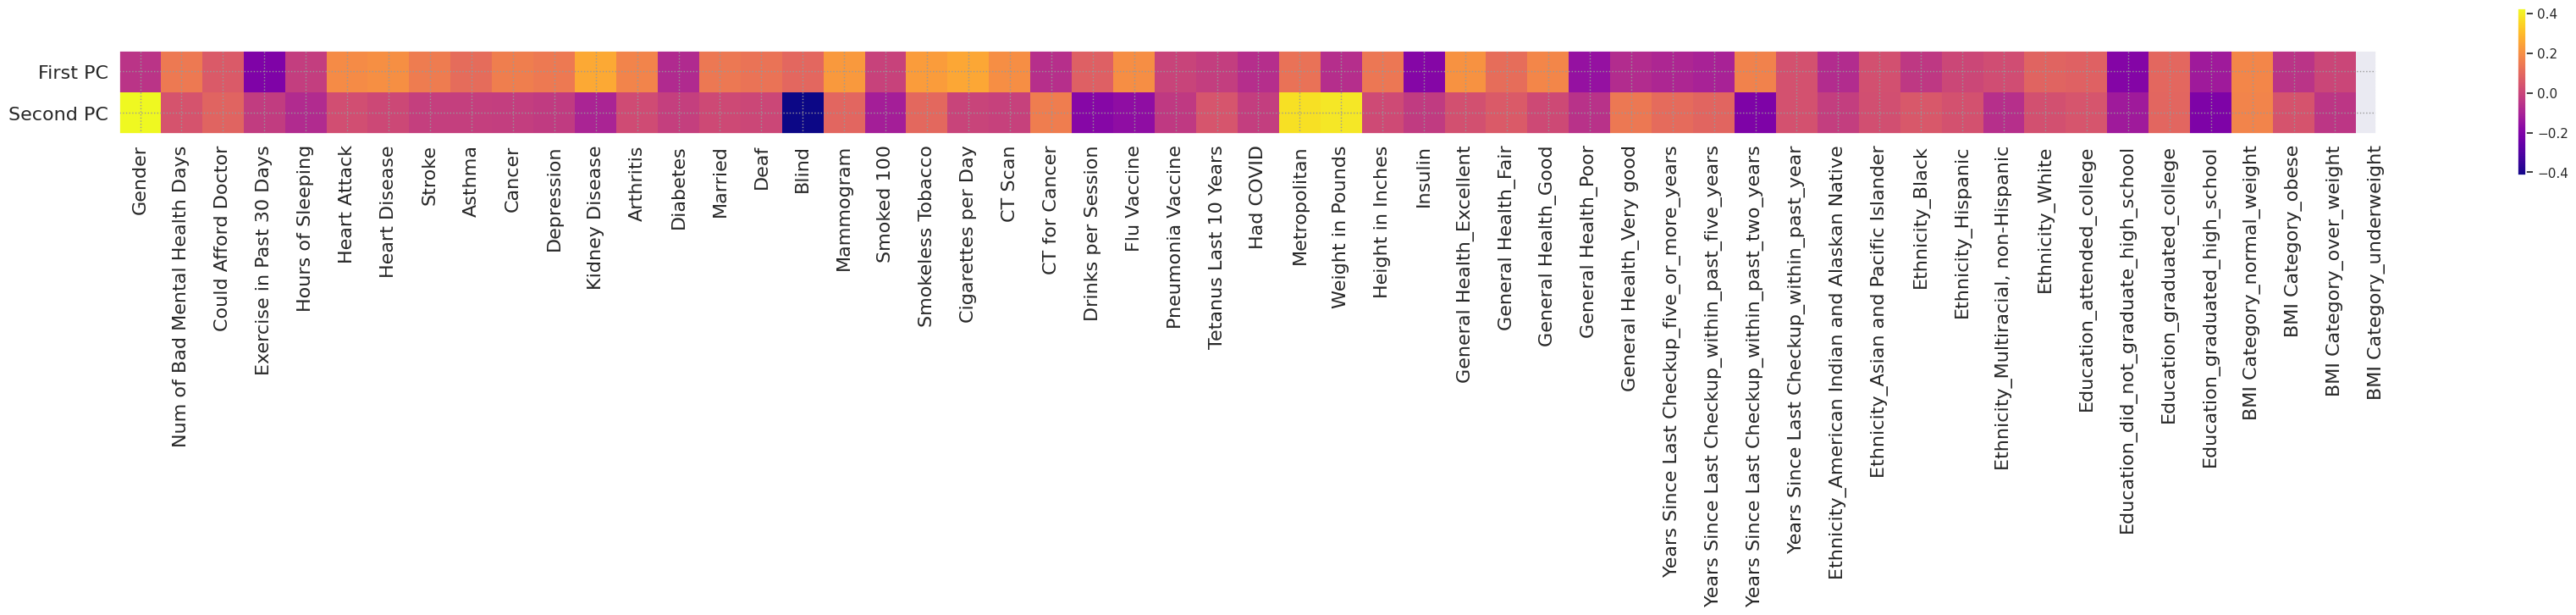

In [72]:
def plot_pca_heatmap(pca, feature_names):
    pc_names = ["First PC", "Second PC"]
    fig, ax = plt.subplots(figsize=(35, 6))

    plt.imshow(pca.components_, interpolation="none", cmap="plasma")
    plt.xticks(np.arange(0, len(feature_names), 1), feature_names, rotation=75, fontsize=16)
    plt.yticks(np.arange(0.0, 2, 1), pc_names, fontsize=16)
    plt.colorbar()
    plt.tight_layout()

    return
plot_pca_heatmap(pca, df.columns)

In [65]:
loadings = pca.components_
features = []
for l in loadings:
    index = np.argmax(np.abs(l))
    features.append(df.columns[index])
features

['Kidney Disease', 'Gender']

In [62]:
def create_biplot(pca,data,loadings,features):
    X=pca.transform(data)
    #Creating dictionary for column names to map to indices
    dic={name:i for i,name in enumerate(df.columns) if name in features}
    x_score = X[:,0]
    y_score = X[:,1]
    x_scale = 3.0 / (x_score.max() - x_score.min())
    y_scale = 3.0 / (y_score.max() - y_score.min())

    plt.figure(figsize=(8,8))
    plt.scatter(x_score * x_scale, y_score * y_scale, s = .9, alpha = .5)
    for name, i in dic.items():
        plt.arrow(0,0,loadings[0,i]*2,loadings[1,i]*2,color = 'red')
        plt.text(loadings[0,i] * 2,loadings[1,i]*2,name,color='green',ha='left',va='top',fontsize='x-large',rotation=315)

    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.grid()
    plt.tight_layout()


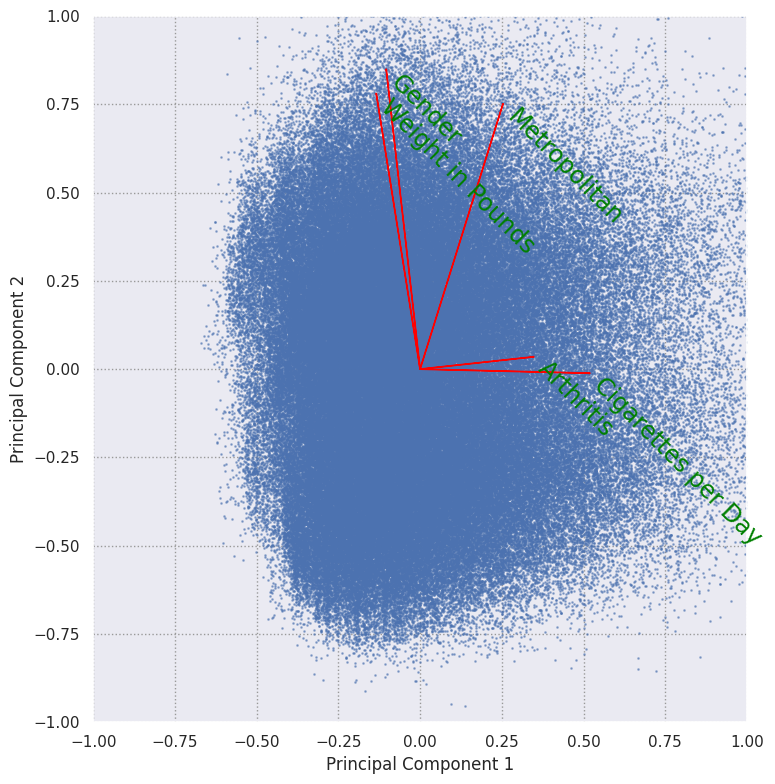

In [74]:
top_features = ['Cigarettes per Day','Arthritis','Weight in Pounds','Metropolitan','Gender']
create_biplot(pca,X,loadings=loadings, features = top_features)
plt.grid()

In [28]:
df.columns

Index(['Gender', 'Num of Bad Mental Health Days', 'Could Afford Doctor',
       'Exercise in Past 30 Days', 'Hours of Sleeping', 'Heart Attack',
       'Heart Disease', 'Stroke', 'Asthma', 'Cancer', 'Depression',
       'Kidney Disease', 'Arthritis', 'Diabetes', 'Married', 'Deaf', 'Blind',
       'Mammogram', 'Smoked 100', 'Smokeless Tobacco', 'Cigarettes per Day',
       'CT Scan', 'CT for Cancer', 'Drinks per Session', 'Flu Vaccine',
       'Pneumonia Vaccine', 'Tetanus Last 10 Years', 'Had COVID',
       'Metropolitan', 'Weight in Pounds', 'Height in Inches', 'Insulin',
       'General Health_Excellent', 'General Health_Fair',
       'General Health_Good', 'General Health_Poor',
       'General Health_Very good',
       'Years Since Last Checkup_five_or_more_years',
       'Years Since Last Checkup_within_past_five_years',
       'Years Since Last Checkup_within_past_two_years',
       'Years Since Last Checkup_within_past_year',
       'Ethnicity_American Indian and Alaskan Native'